# Desafio - Regressão Multipla

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [81]:
# Carregando DataFrame
df_aluguel = pd.read_csv('.\datasets\dataset_aluguel.csv')

In [82]:
# Informações do DataFrame
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


In [83]:
# Primeiras 10 linhad do DataFrame
df_aluguel.head(10)

,id,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,1,106.181018,1,36.760806,0,True,False,1767.122088
1,2,192.607146,4,10.453581,1,True,False,3278.742397
2,3,159.799091,5,27.072399,1,True,False,2953.899737
3,4,139.798773,4,34.789220,1,False,True,2514.717108
4,5,73.402796,5,11.427501,0,False,True,1942.164396
5,6,73.399178,5,8.747746,1,True,False,2141.303241
6,7,58.712542,3,49.108417,1,True,False,1625.680981
7,8,179.926422,5,25.831795,0,False,True,2854.591908
8,9,140.167252,4,13.041459,1,True,False,2702.673542
9,10,156.210887,5,49.812685,1,False,False,2456.538289


In [84]:
# Removendo coluna 'id' do DataFrame
df_aluguel.drop(columns=['id'], axis=1, inplace=True)

In [85]:
# Renomeando colunas - removendo acentos
df_aluguel.columns = ['tamanho_m2', 'quant_quartos', 'idade_casa', 'quant_garagem', 'localizacao_periferia', 'localizacao_suburbio', 'valor_aluguel']

In [86]:
# Convertendo o tipo float da coluna idade_casa para inteiro
df_aluguel.idade_casa = df_aluguel.idade_casa.astype(int)

In [87]:
# Quantidade de valores nulos no DataFrame
df_aluguel.isna().sum()

tamanho_m2               0
quant_quartos            0
idade_casa               0
quant_garagem            0
localizacao_periferia    0
localizacao_suburbio     0
valor_aluguel            0
dtype: int64

In [89]:
# Medidas estatisticas do DataFrame
df_aluguel.describe()

,tamanho_m2,quant_quartos,idade_casa,quant_garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.290000,0.520000,2112.819084
std,44.623412,1.400541,14.397878,0.502117,514.314100
min,50.828318,1.000000,0.000000,0.000000,1192.728727
25%,78.980114,1.750000,13.000000,0.000000,1694.633091
50%,119.621368,3.000000,24.000000,1.000000,2069.395680
75%,159.530468,4.000000,37.000000,1.000000,2520.182679
max,198.033040,5.000000,49.000000,1.000000,3278.742397


In [138]:
df_aluguel.quant_quartos.unique()

array([1, 4, 5, 3, 2])

In [90]:
# Convertendo booleano para inteiro
df_aluguel.localizacao_periferia = df_aluguel.localizacao_periferia.astype(int)
df_aluguel.localizacao_suburbio = df_aluguel.localizacao_suburbio.astype(int)

In [91]:
df_aluguel.head(10)

,tamanho_m2,quant_quartos,idade_casa,quant_garagem,localizacao_periferia,localizacao_suburbio,valor_aluguel
0,106.181018,1,36,0,1,0,1767.122088
1,192.607146,4,10,1,1,0,3278.742397
2,159.799091,5,27,1,1,0,2953.899737
3,139.798773,4,34,1,0,1,2514.717108
4,73.402796,5,11,0,0,1,1942.164396
5,73.399178,5,8,1,1,0,2141.303241
6,58.712542,3,49,1,1,0,1625.680981
7,179.926422,5,25,0,0,1,2854.591908
8,140.167252,4,13,1,1,0,2702.673542
9,156.210887,5,49,1,0,0,2456.538289


<Axes: xlabel='tamanho_m2'>

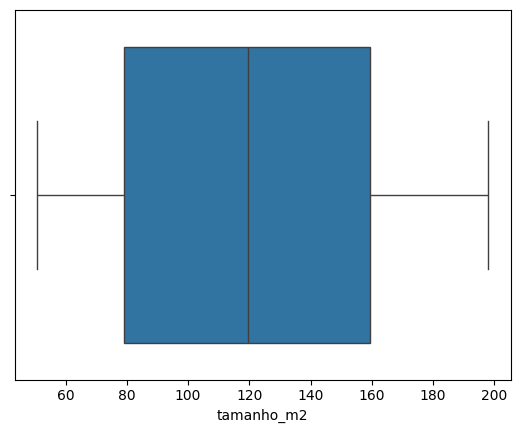

In [92]:
# Verificando outliers da coluna 'tamanho_m2'
sns.boxplot(data=df_aluguel, x='tamanho_m2')

<Axes: xlabel='quant_quartos'>

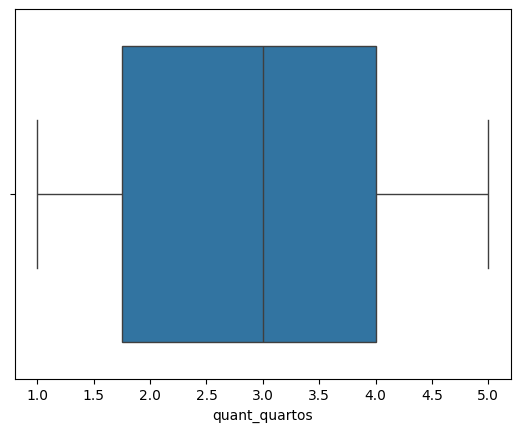

In [93]:
# Verificando outliers da coluna 'quant_quartos'
sns.boxplot(data=df_aluguel, x='quant_quartos')

<Axes: xlabel='idade_casa'>

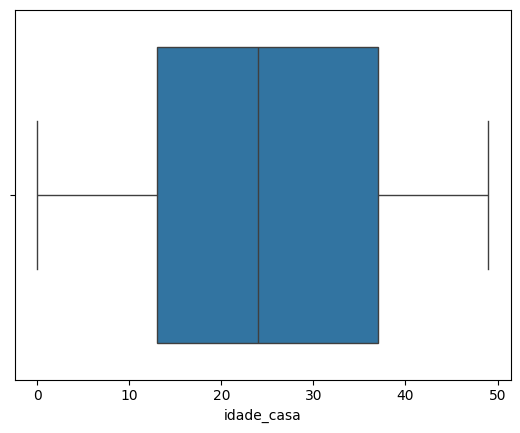

In [94]:
# Verificando outliers da coluna 'idade_casa'
sns.boxplot(data=df_aluguel, x='idade_casa')

<Axes: xlabel='valor_aluguel'>

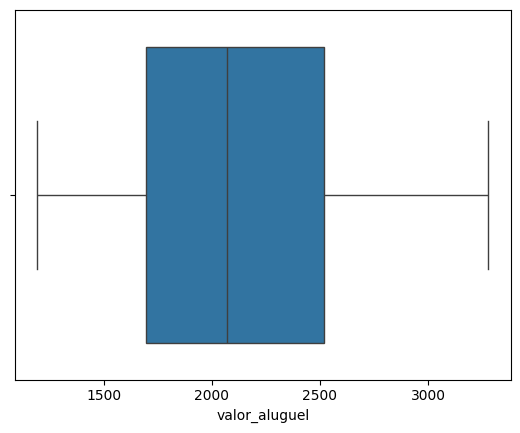

In [95]:
# Verificando outliers da coluna 'valor_aluguel'
sns.boxplot(data=df_aluguel, x='valor_aluguel')

Não há outliers no DataFrame

<Axes: xlabel='tamanho_m2', ylabel='valor_aluguel'>

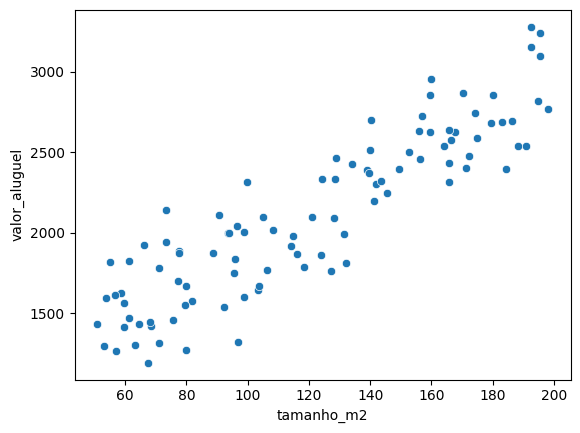

In [96]:
# Cruzamento de variáveis numericas com a variavel valor
sns.scatterplot(data=df_aluguel, x='tamanho_m2', y='valor_aluguel')

<Axes: xlabel='quant_quartos', ylabel='valor_aluguel'>

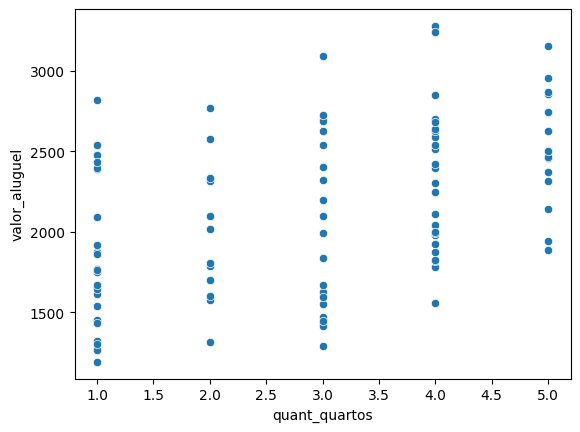

In [97]:
sns.scatterplot(data=df_aluguel, x='quant_quartos', y='valor_aluguel')

<Axes: xlabel='idade_casa', ylabel='valor_aluguel'>

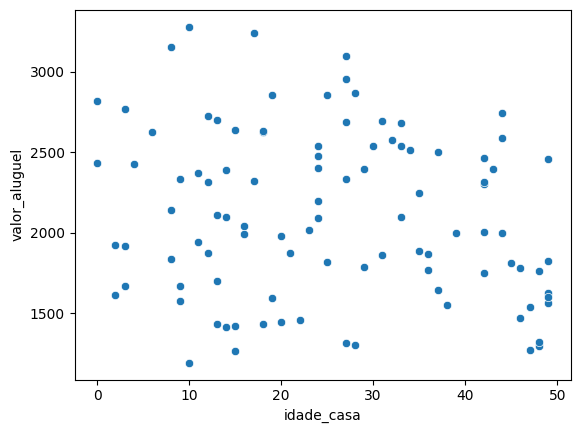

In [98]:
sns.scatterplot(data=df_aluguel, x='idade_casa', y='valor_aluguel')

Ao verificar os cruzamentos das variaveis numericas com a variavel target, verifica-se que a variavel 'tamanho_m2' possui maior correlação com a variavel target

<Axes: xlabel='tamanho_m2', ylabel='Count'>

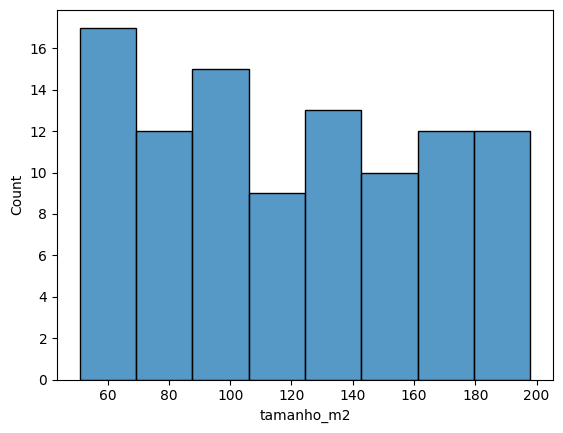

In [99]:
sns.histplot(data=df_aluguel.tamanho_m2)

<Axes: xlabel='idade_casa', ylabel='Count'>

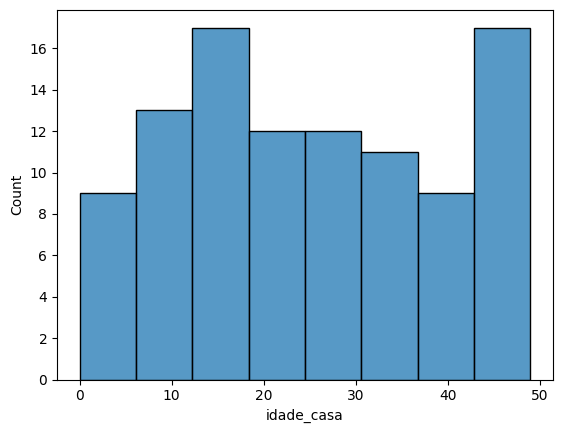

In [100]:
sns.histplot(data=df_aluguel.idade_casa)

<Axes: xlabel='quant_quartos', ylabel='Count'>

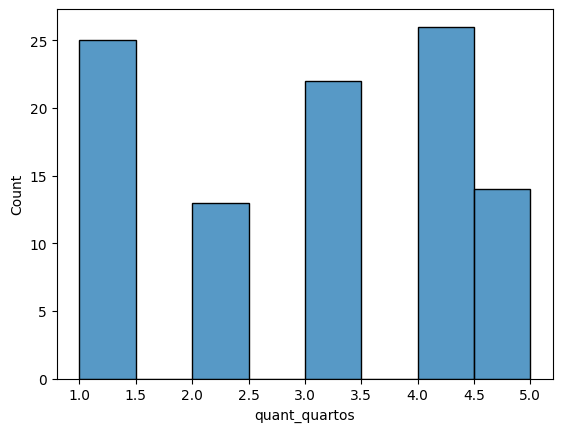

In [101]:
sns.histplot(data=df_aluguel.quant_quartos)

<Axes: xlabel='valor_aluguel', ylabel='Count'>

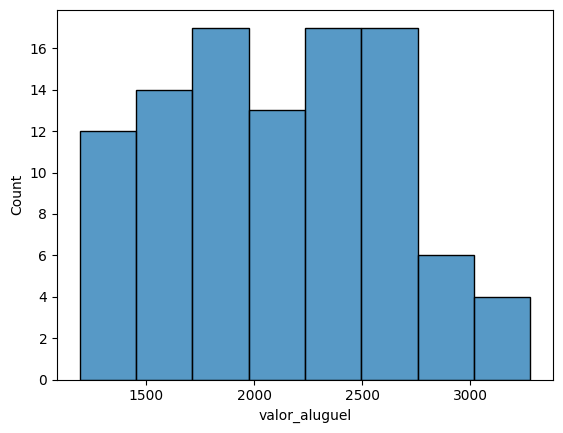

In [102]:
sns.histplot(data=df_aluguel.valor_aluguel)

<Axes: >

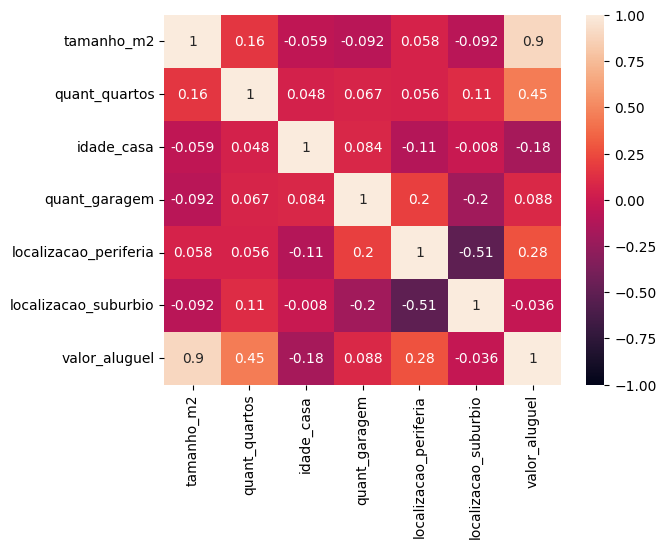

In [103]:
sns.heatmap(df_aluguel.corr(), vmin=-1, vmax=1, annot=True)

Ao analizar o heatmap, verifica-se que realmente o tamanho_m2 possui uma maior correlação com o valor do aluguel (0.9) em relação as demais variaveis, alem disso verificamos que a quantidade de quartos possui uma boa correlação (0.45) e, ainda, temos que a localizacao da casa tbm possui correlaçao com o valor do aluguel.

<Axes: >

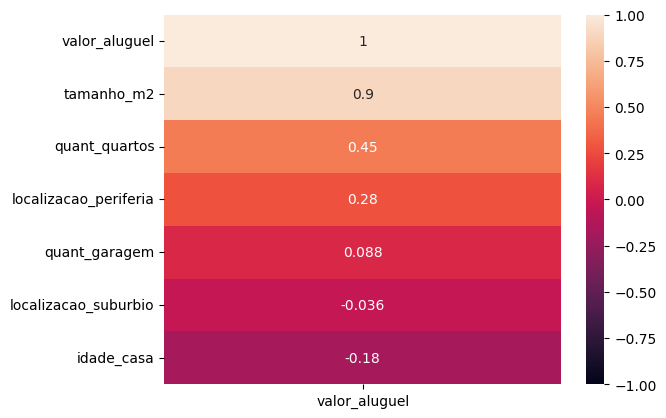

In [104]:
sns.heatmap(df_aluguel.corr()[['valor_aluguel']].sort_values(by='valor_aluguel', ascending=False), vmin=-1, vmax=1, annot=True)

In [107]:
# Gerando conjunto de teste e de treino
x = df_aluguel.drop(columns=["valor_aluguel"], axis=1)
y = df_aluguel.valor_aluguel
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, random_state=51)

In [108]:
df_aluguel.head(10)

,tamanho_m2,quant_quartos,idade_casa,quant_garagem,localizacao_periferia,localizacao_suburbio,valor_aluguel
0,106.181018,1,36,0,1,0,1767.122088
1,192.607146,4,10,1,1,0,3278.742397
2,159.799091,5,27,1,1,0,2953.899737
3,139.798773,4,34,1,0,1,2514.717108
4,73.402796,5,11,0,0,1,1942.164396
5,73.399178,5,8,1,1,0,2141.303241
6,58.712542,3,49,1,1,0,1625.680981
7,179.926422,5,25,0,0,1,2854.591908
8,140.167252,4,13,1,1,0,2702.673542
9,156.210887,5,49,1,0,0,2456.538289


In [109]:
# Colunas numericas
colunas_numericas = ['tamanho_m2', 'quant_quartos', 'quant_garagem', 'idade_casa']

In [110]:
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessor
preprocessor = ColumnTransformer(transformers=[('num', transformer_numericas, colunas_numericas)])

In [111]:
# Criando modelo
model_regr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [112]:
# Treinando modelo
model_regr.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [114]:
# Calcular predicao
y_pred = model_regr.predict(x_test)

In [115]:
# Calcular R2 score
r2_score(y_pred, y_test)

0.9109527261582515

modelo possui uma boa avaliação

In [ ]:
# Calcular MEA
mean_absolute_error(y_test, y_pred)

116.55840606610812

dentro do contexto, o MEA é aceitavel

In [117]:
# Calcular MSE
import numpy as np
np.sqrt(mean_absolute_error(y_test, y_pred))

np.float64(10.796221842205176)

In [118]:
# Calculo de residuos
residuos = y_test - y_pred

In [119]:
from scipy.stats import zscore
residuos_std = zscore(residuos)

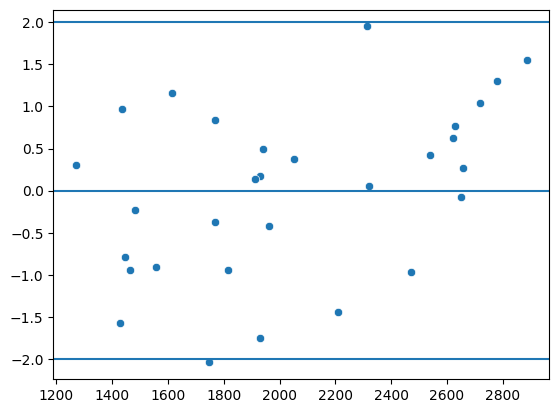

In [ ]:
# Verificar linearidade dos residuos, valores entre -2 e 2
# Verificar homocedasticidade, valores proximos a reta 0

sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2)
plt.axhline(y=-2)

residuos possuem linearidade e não possuem homocedasticidade

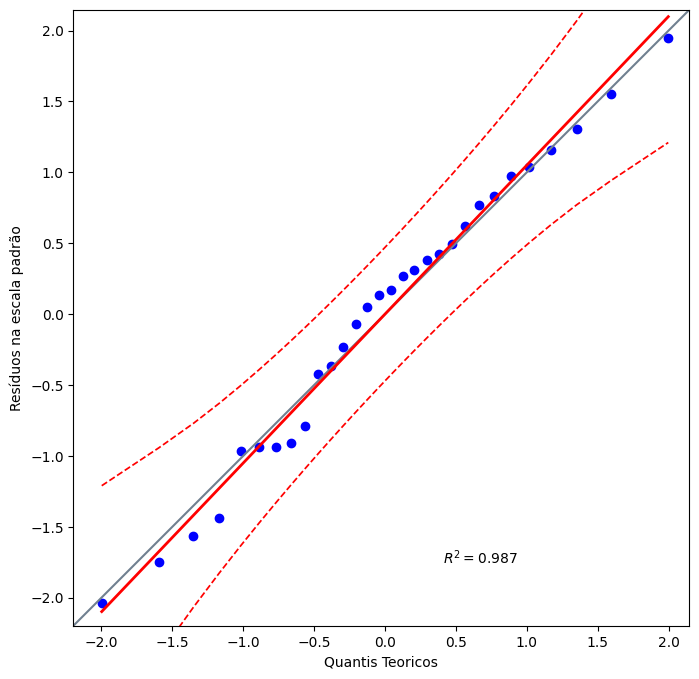

In [126]:
import pingouin as pg
plt.figure(figsize=(12,8))
pg.qqplot(residuos_std, dist='norm', confidence = 0.95)
plt.xlabel('Quantis Teoricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [133]:
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

stat_shapiro, pvalue_shapiro = shapiro(residuos)
stat_ks, pvalue_ks = kstest(residuos, 'norm')
stat_ll, pvalue_ll = lilliefors(residuos, dist='norm', pvalmethod = 'table')
stat_and, critical_and, significance_and = anderson(residuos, dist='norm')

print("Teste de Shapiro: \n-Estatistica: {}\n-Pvalue: {}\n".format(stat_shapiro, pvalue_shapiro))
print("Teste de Kolmogorov: \n-Estatistica: {}\n-Pvalue: {}\n".format(stat_ks, pvalue_ks))
print("Teste de Lilliefors: \n-Estatistica: {}\n-Pvalue: {}\n".format(stat_ll, pvalue_ll))
print("Teste de Anderson: \n-Estatistica: {}\n-Valor Critico: {}\n".format(stat_and, critical_and[2]))

Teste de Shapiro: 
-Estatistica: 0.9803781120885906
-Pvalue: 0.8355190617344586

Teste de Kolmogorov: 
-Estatistica: 0.5333333332236561
-Pvalue: 1.693588732151395e-08

Teste de Lilliefors: 
-Estatistica: 0.08650931168790421
-Pvalue: 0.8096210446305258

Teste de Anderson: 
-Estatistica: 0.22740718031612417
-Valor Critico: 0.712



Verificamos que os testes de Shapiro, Lilliefors e Anderson sugerem que os dados seguem uma distribuição normal, entretanto o teste de Kolmogorov suger que os dados não seguem uma distribuição normal

In [136]:
# Testes de homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
x_test_transformed = pipe.fit_transform(x_test)
test_goldfeld = het_goldfeldquandt(residuos, x_test_transformed)
stat_goldfeld = test_goldfeld[0]
pvalue_goldfeld = test_goldfeld[1]
print("Test Goldfeld-Quandt: \n-Estatistica do Teste: {} \n-Pvalue: {}".format(stat_goldfeld ,pvalue_goldfeld))

Test Goldfeld-Quandt: 
-Estatistica do Teste: 0.817223848951377 
-Pvalue: 0.6281417322078158


Como pvalue é maior que 0.05 temos que os dados seguem a homocedasticidade

In [137]:
# Predicoes

import joblib

joblib.dump(model_regr, '.\modelo_aluguel.pkl')

['.\\modelo_aluguel.pkl']